# Analyzing the `gapminder` dataset using Python

## Import packages and setup the notebook

In [3]:
# Import libraries
import pandas as pd
import numpy as np

# Turn off notebook package warnings
import warnings
warnings.filterwarnings('ignore')

# print graphs in the document
%matplotlib inline

 Load the data with Pandas

In [4]:
gapminder_data = "data/gapminder.csv"
gapminder = pd.read_table(gapminder_data, sep=",")

##Print the first five rows of the `gapminder` DataFrame

In [5]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## What is the average (mean) life expectancy for the entire dataset?

In [6]:
gapminder.lifeExp.mean()

59.47443936619713

## What is the average (mean) life expectancy, for each continent?

In [7]:
gapminder_cont = gapminder.groupby('continent')
gapminder_cont.lifeExp.mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

## For each country in Oceania, print the subset of the data for that country

In [8]:
gapminder_ocean = gapminder[gapminder['continent']== 'Oceania']
gapminder_ocean_country = gapminder_ocean.groupby('country').head()
gapminder_ocean_country
#I am not sure if I have supposed to have mulitple rows

,country,continent,year,lifeExp,pop,gdpPercap
60,Australia,Oceania,1952,69.12,8691212,10039.59564
61,Australia,Oceania,1957,70.33,9712569,10949.64959
62,Australia,Oceania,1962,70.93,10794968,12217.22686
63,Australia,Oceania,1967,71.10,11872264,14526.12465
64,Australia,Oceania,1972,71.93,13177000,16788.62948
1092,New Zealand,Oceania,1952,69.39,1994794,10556.57566
1093,New Zealand,Oceania,1957,70.26,2229407,12247.39532
1094,New Zealand,Oceania,1962,71.24,2488550,13175.67800
1095,New Zealand,Oceania,1967,71.52,2728150,14463.91893
1096,New Zealand,Oceania,1972,71.89,2929100,16046.03728


## Sort `gapminder` by population. Make sure the sorted object replaces the existing `gapminder` DataFrame

In [9]:
gapminder = gapminder.sort_values('pop')
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
1296,Sao Tome and Principe,Africa,1952,46.471,60011,879.583586
1297,Sao Tome and Principe,Africa,1957,48.945,61325,860.736903
420,Djibouti,Africa,1952,34.812,63149,2669.529475
1298,Sao Tome and Principe,Africa,1962,51.893,65345,1071.551119
1299,Sao Tome and Principe,Africa,1967,54.425,70787,1384.840593


## Using `seaborn`, generate a scatterplot depicting the relationship between population and life expectancy and include a linear best fit line

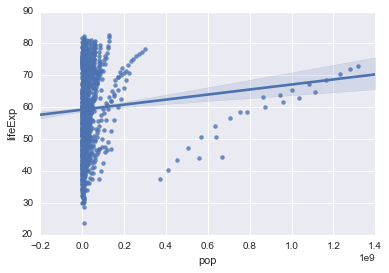

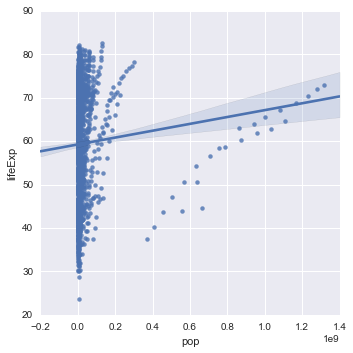

In [12]:
import seaborn as sns
sns.regplot(x="pop", y="lifeExp", data= gapminder)
sns.lmplot(x="pop", y="lifeExp", data= gapminder)

### Generate the same graph as above, but this time log-transform the population variable

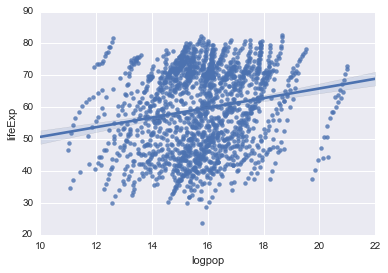

In [39]:
gapminder['logpop'] = np.log(gapminder['pop'])
sns.regplot(x="logpop",y="lifeExp", data= gapminder)

## Write a Function 
#### (To Assess the Relationship Between Year and Life Expectancy for a Given Country)

Here the goal is to write a basic function, "life_expectancy", that incorporates your work above. 

By default, the function should return a scatterplot of life-expectancy versus years **for a given country**. 
[Hint: Subset the data for a specific country, similar to a problem above]

Once you subset the data, the function should do one of two things: 
* (1) return a graph **[or]**
* (2) return a graph and model results. 

Thus, your function should have arguments and output as follows:

```
*   Arguments:
        Country (required):   The name of a specific country, such as "Australia"
        Model   (optional):   Build and Return a Model Results, #Hint, set the default to be False

*   Output: 
        (1) - Default: A scatterplot of the relationship with best fit line
        (2) - Model:   The above graph AND the model results
```

#### Of course, we have not yet covered modeling in Python. 

To run a linear model, we can use the library [statsmodels](http://statsmodels.sourceforge.net), to predict life expectancy by year.

#### Example for this problem:

In [ ]:
import statsmodels.formula.api as sm #Import Package
model = sm.ols(formula = 'lifeExp ~ year', data = gapminder).fit() #Fit OLS Model
results = model.summary() #Get Results
print(results) # Print

#Hint: Use this Code in Your Function. 
#You will need to replace data = gapminder, with the data subset for a specific country.

Axes(0.125,0.125;0.775x0.775)


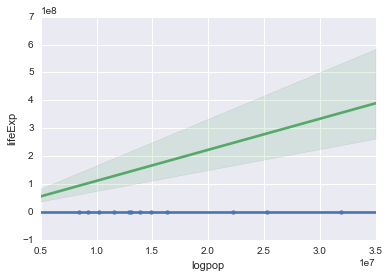

In [58]:
def life_expectancy (df, name):
    import seaborn as sns
    import numpy as np
    newdf = df[df['country']== name]
    popvlife = sns.regplot(x='pop', y='lifeExp', data = newdf)
    print(popvlife)
    newdf['logpop'] = np.log(newdf['pop'])
    logpopvlife = sns.regplot(x='logpop', y='lifeExp', data = newdf)
    print(logpopvlife)
life_expectancy(gapminder, 'Afghanistan')
    
    

## Advanced Challenge (Optional) 

### Assess the relationship between year and life expectancy

As you know already, [the general trend is that over time life expectancy increases, but the trend is different for each country](http://r4ds.had.co.nz/many-models.html). Some experience a greater increase than others, whereas some countries experience declines in life expectancy. You can use whatever method you wish to assess and explain this relationship using Python.

* You could draw a graph
* You could draw a graph which visualizes the differing relationships between countries
* You could estimate a correlation coefficient
* [You could estimate a statistical model](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb) - note that the notebook as written uses Python 2. For the most part it works with Python 3 though.
* You could estimate a statistical model for each country

Use whichever method you think you can master before the assignment is due. Some of you may just stick to basic graphs and tables, while others might build a statistical model using `statsmodel`. Obviously the more advanced technique you use, the higher your ceiling will be for your evaluation. But don't spend 10 hours getting this to work! Go with what you can accomplish in a reasonable amount of time.